#### 1. (30 points) Download the sample_dataset1.txt file to your desktop from the Week6 folder on Blackboard.

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

* a) Use Pandas to read the file and store them in a DataFrame (DF) object named data. Then, display first few rows of the data frame (Hint: You can see the Slide 28 from our PowerPoint presentation file from the Week6folder to write the path of the data set).

In [187]:
PATH = r"C:\Users\PAVAN KANAMARLAPUDI\Desktop\Sai\sample data.txt"

In [188]:
import pandas as pd

In [189]:
data=pd.read_csv(PATH,header=None)

In [190]:
data.head()

,0,1,2,3,4
0,5.4,3.7,1.5,0.2,Class-A
1,4.8,3.4,1.6,0.2,Class-A
2,4.8,3.0,1.4,0.1,Class-A
3,4.3,3.0,1.1,0.1,Class-A
4,5.8,4.0,1.2,0.2,Class-A


* b) For each quantitative attribute (first attribute, second attribute, third attribute, and fourth attribute) calculate
its average, standard deviation, minimum, and maximum values.

In [191]:
data = data.rename(columns=dict(zip(list(range(0,6)),["First","Second","Third","Fourth","Fifth"])))

In [192]:
data.head()

,First,Second,Third,Fourth,Fifth
0,5.4,3.7,1.5,0.2,Class-A
1,4.8,3.4,1.6,0.2,Class-A
2,4.8,3.0,1.4,0.1,Class-A
3,4.3,3.0,1.1,0.1,Class-A
4,5.8,4.0,1.2,0.2,Class-A


In [35]:
data.mean(axis=0)

First     5.861667
Second    3.066667
Third     3.760000
Fourth    1.205833
dtype: float64

In [36]:
data.std(axis=0)

First     0.819939
Second    0.441223
Third     1.758838
Fourth    0.762602
dtype: float64

In [37]:
data.min(numeric_only=True)

First     4.3
Second    2.0
Third     1.0
Fourth    0.1
dtype: float64

In [38]:
data.max(numeric_only=True)

First     7.9
Second    4.4
Third     6.7
Fourth    2.5
dtype: float64

* c) For each qualitative attribute (class), count the frequency for each of its distinct values.

In [40]:
data['Fifth'].value_counts()

Class-C    40
Class-B    40
Class-A    40
Name: Fifth, dtype: int64

* d) Display the summary for all the attributes simultaneously in a table using the describe() function.

In [42]:
data.describe()

,First,Second,Third,Fourth
count,120.000000,120.000000,120.000000,120.000000
mean,5.861667,3.066667,3.760000,1.205833
std,0.819939,0.441223,1.758838,0.762602
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.425000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.500000


* e) Display the histogram for the first attribute by discretizing it into 8 separate bins and counting the frequency
for each bin.

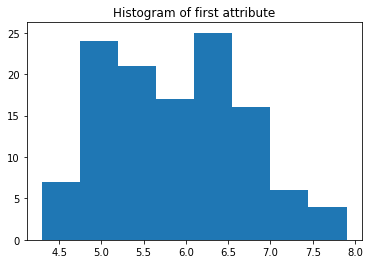

In [50]:
data['First'].hist(bins=8,grid=False)
plt.title("Histogram of first attribute")
plt.show()

* f) Show the distribution of values for each attribute.

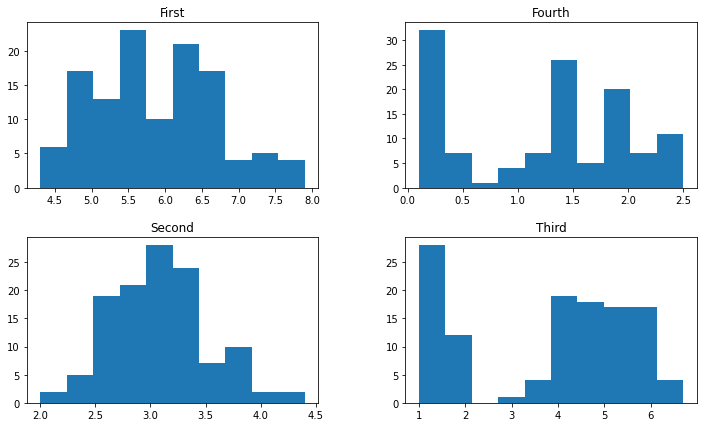

In [62]:
data.hist(figsize=(12,7),grid=False)
plt.show()

* g) For each pair of attributes, use a scatter plot to visualize their joint distribution.

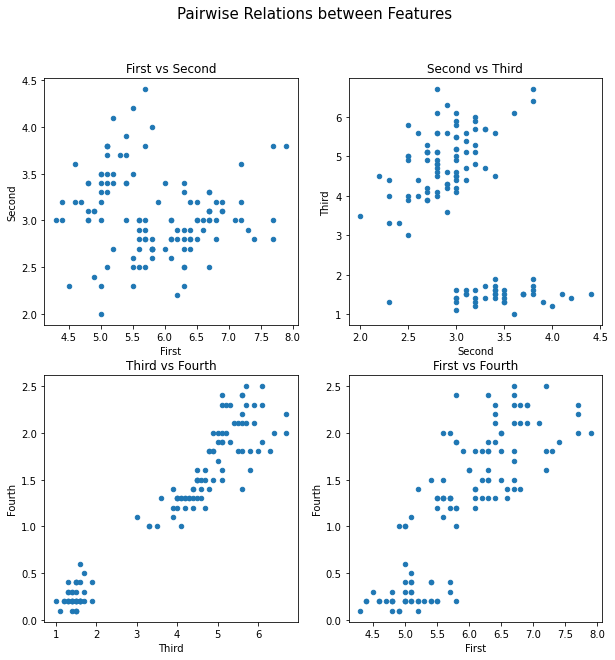

In [105]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# ax1.jointplot(x="First",y="Second",data=data,ax=ax1)
# sns.jointplot(x="First",y="Second",data=data,ax=ax1)
data.plot.scatter("First","Second",ax=ax1,title="First vs Second")
data.plot.scatter("Second","Third",ax=ax2,title="Second vs Third")
data.plot.scatter("Third","Fourth",ax=ax3,title="Third vs Fourth")
data.plot.scatter("First","Fourth",ax=ax4,title="First vs Fourth")
# ax1.set_title("First vs Second")
# plt.title("Pairwise Relations between Features")
fig.suptitle('Pairwise Relations between Features',size=15) 
plt.show()

# sns.jointplot(data=data,x="First",y="Second",ax=ax1)

* h) Plot the distribution values with parallel coordinates

In [186]:
from pandas.plotting import parallel_coordinates

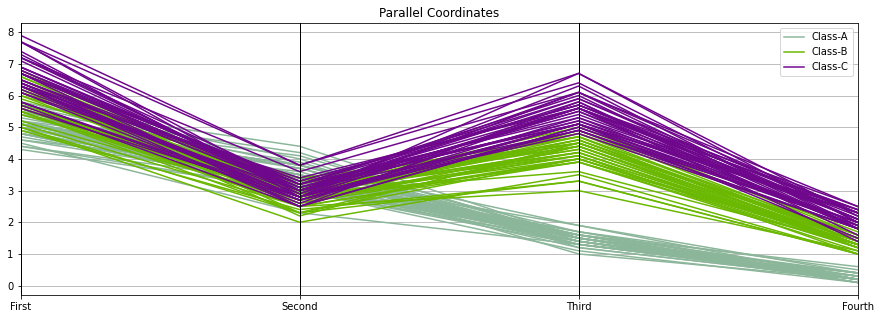

In [200]:
plt.figure(figsize=(15,5))
parallel_coordinates(data,"Fifth")
plt.title("Parallel Coordinates")
plt.show()


#### 2. (15 points) Download the sample_dataset2.csv file to your desktop from the Week6 folder on Blackboard.


* a) Load this data set using Pandas. Then, draw a line plot of its __daily__ time series.

In [202]:
# data = pd.read_csv(r"C:\Users\PAVAN KANAMARLAPUDI\Desktop\Sai\sample_dataset2.csv",parse_dates=['DATE'],
#                                 index_col=['DATE'])


daily = pd.read_csv(r"C:\Users\PAVAN KANAMARLAPUDI\Desktop\Sai\sample_dataset2.csv",parse_dates=['DATE'],index_col=['DATE'])

# It's a 10 Years ( 2005 to 2015 Data)

In [182]:
# data[(data.DATE.dt.year==2006) & (data.DATE.dt.month==1)]

In [167]:
print("Min:",data.DATE.min(),", Max:",data.DATE.max()," ---> Difference:",data.DATE.max()-data.DATE.min())

Min: 2005-01-01 00:00:00 , Max: 2015-12-31 00:00:00  ---> Difference: 4016 days 00:00:00


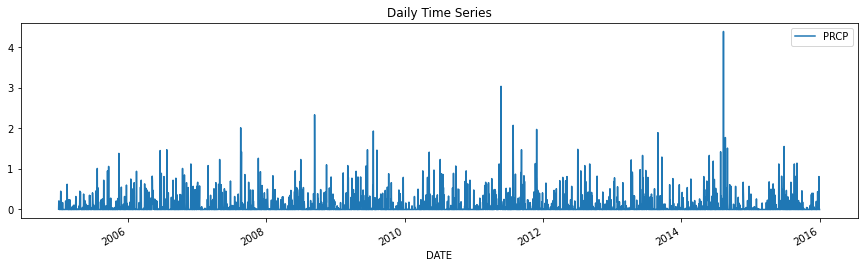

In [207]:
ax=daily.plot(kind="line",figsize=(15,4))
ax.set_title("Daily Time Series")
plt.show()

* b) Draw the **monthly** time series line plot of the same data set.

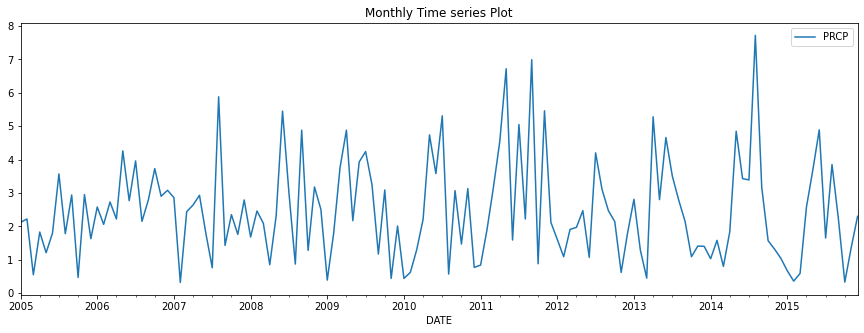

In [210]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,5))
ax.set_title("Monthly Time series Plot")
plt.show()

* c) Group the daily precipitation time series and aggregate it by year to obtain the **annual** precipitation values.

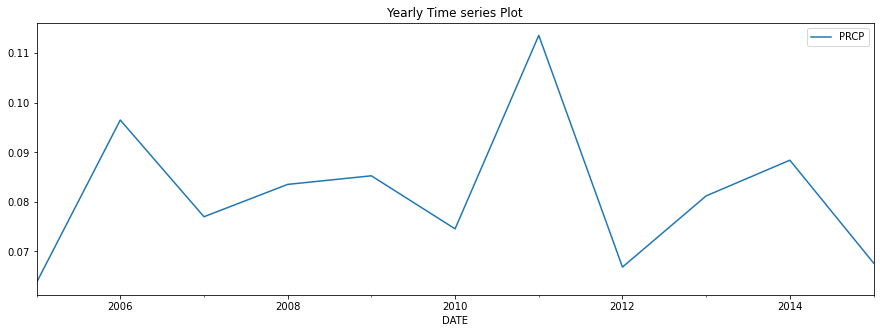

In [212]:
monthly = daily.groupby(pd.Grouper(freq='Y')).mean()
ax = monthly.plot(kind='line',figsize=(15,5))
ax.set_title("Yearly Time series Plot")
plt.show()